In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read the file

In [2]:
emissions_data = pd.read_csv('emissions.csv')
print(emissions_data.columns)
print(emissions_data.shape)

Index(['timestamp', 'project_name', 'run_id', 'experiment_id', 'duration',
       'emissions', 'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power',
       'cpu_energy', 'gpu_energy', 'ram_energy', 'energy_consumed',
       'country_name', 'country_iso_code', 'region', 'cloud_provider',
       'cloud_region', 'os', 'python_version', 'codecarbon_version',
       'cpu_count', 'cpu_model', 'gpu_count', 'gpu_model', 'longitude',
       'latitude', 'ram_total_size', 'tracking_mode', 'on_cloud', 'pue'],
      dtype='object')
(36, 32)


### Process the file

In [3]:
# Select relevant columns for analysis
columns_of_interest = ['project_name', 'duration', 'emissions', 'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power']
emissions_summary = emissions_data[columns_of_interest]
emissions_summary

,project_name,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power
0,"MAE Imputer - South America - Popayán, Colombi...",6.325326,4.593114e-08,7.261467e-09,1.3051,0.0000,3.0
1,"XGBoost Models - South America - Popayán, Colo...",10.680612,9.823912e-07,9.197892e-08,0.0514,0.0000,3.0
2,"MAE Imputer - South America - Popayán, Colombi...",6.935028,1.611106e-07,2.323142e-08,0.0626,0.0000,3.0
3,"XGBoost Models - South America - Popayán, Colo...",10.920815,1.186440e-06,1.086403e-07,0.4699,0.0000,3.0
4,"MAE Imputer - South America - Popayán, Colombi...",7.826622,5.731448e-07,7.323016e-08,2.4412,0.0000,3.0
5,"XGBoost Models - South America - Popayán, Colo...",10.927232,1.076109e-06,9.847955e-08,0.2086,0.0000,3.0
6,"MAE Imputer - North America - Cambridge, MA, U...",6.413308,4.226391e-08,6.590033e-09,0.4978,0.0000,3.0
7,"XGBoost Models - North America - Cambridge, MA...",11.013832,1.635266e-06,1.484739e-07,0.2687,0.0463,3.0
8,"MAE Imputer - North America - Cambridge, MA, U...",7.059210,3.239262e-07,4.588703e-08,1.0366,0.0061,3.0
9,"XGBoost Models - North America - Cambridge, MA...",11.215454,1.641973e-06,1.464027e-07,0.2421,0.0018,3.0


### Analyze the file for batch size of 1, 32, and 64

In [4]:
# Define a function to plot and display results
def analyze_batch(summary_table, batch_label):
    print(f"Analysis for {batch_label}")
    # Plot emissions
    plt.figure(figsize=(20, 12))
    plt.bar(summary_table['project_name'], summary_table['emissions'], color=['blue', 'orange'])
    plt.title(f'Emissions for {batch_label}')
    plt.ylabel('Total Emissions (kg CO2)')
    plt.xlabel('Project Name')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Plot power consumption
    summary_table.set_index('project_name')[['cpu_power', 'gpu_power', 'ram_power']].plot(
        kind='bar', stacked=True, figsize=(20, 12))
    plt.title(f'Average Power Consumption for {batch_label}')
    plt.ylabel('Power (W)')
    plt.xlabel('Project Name')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    return summary_table

### Analysis for batch size of 1

Analysis for Batch Size 1


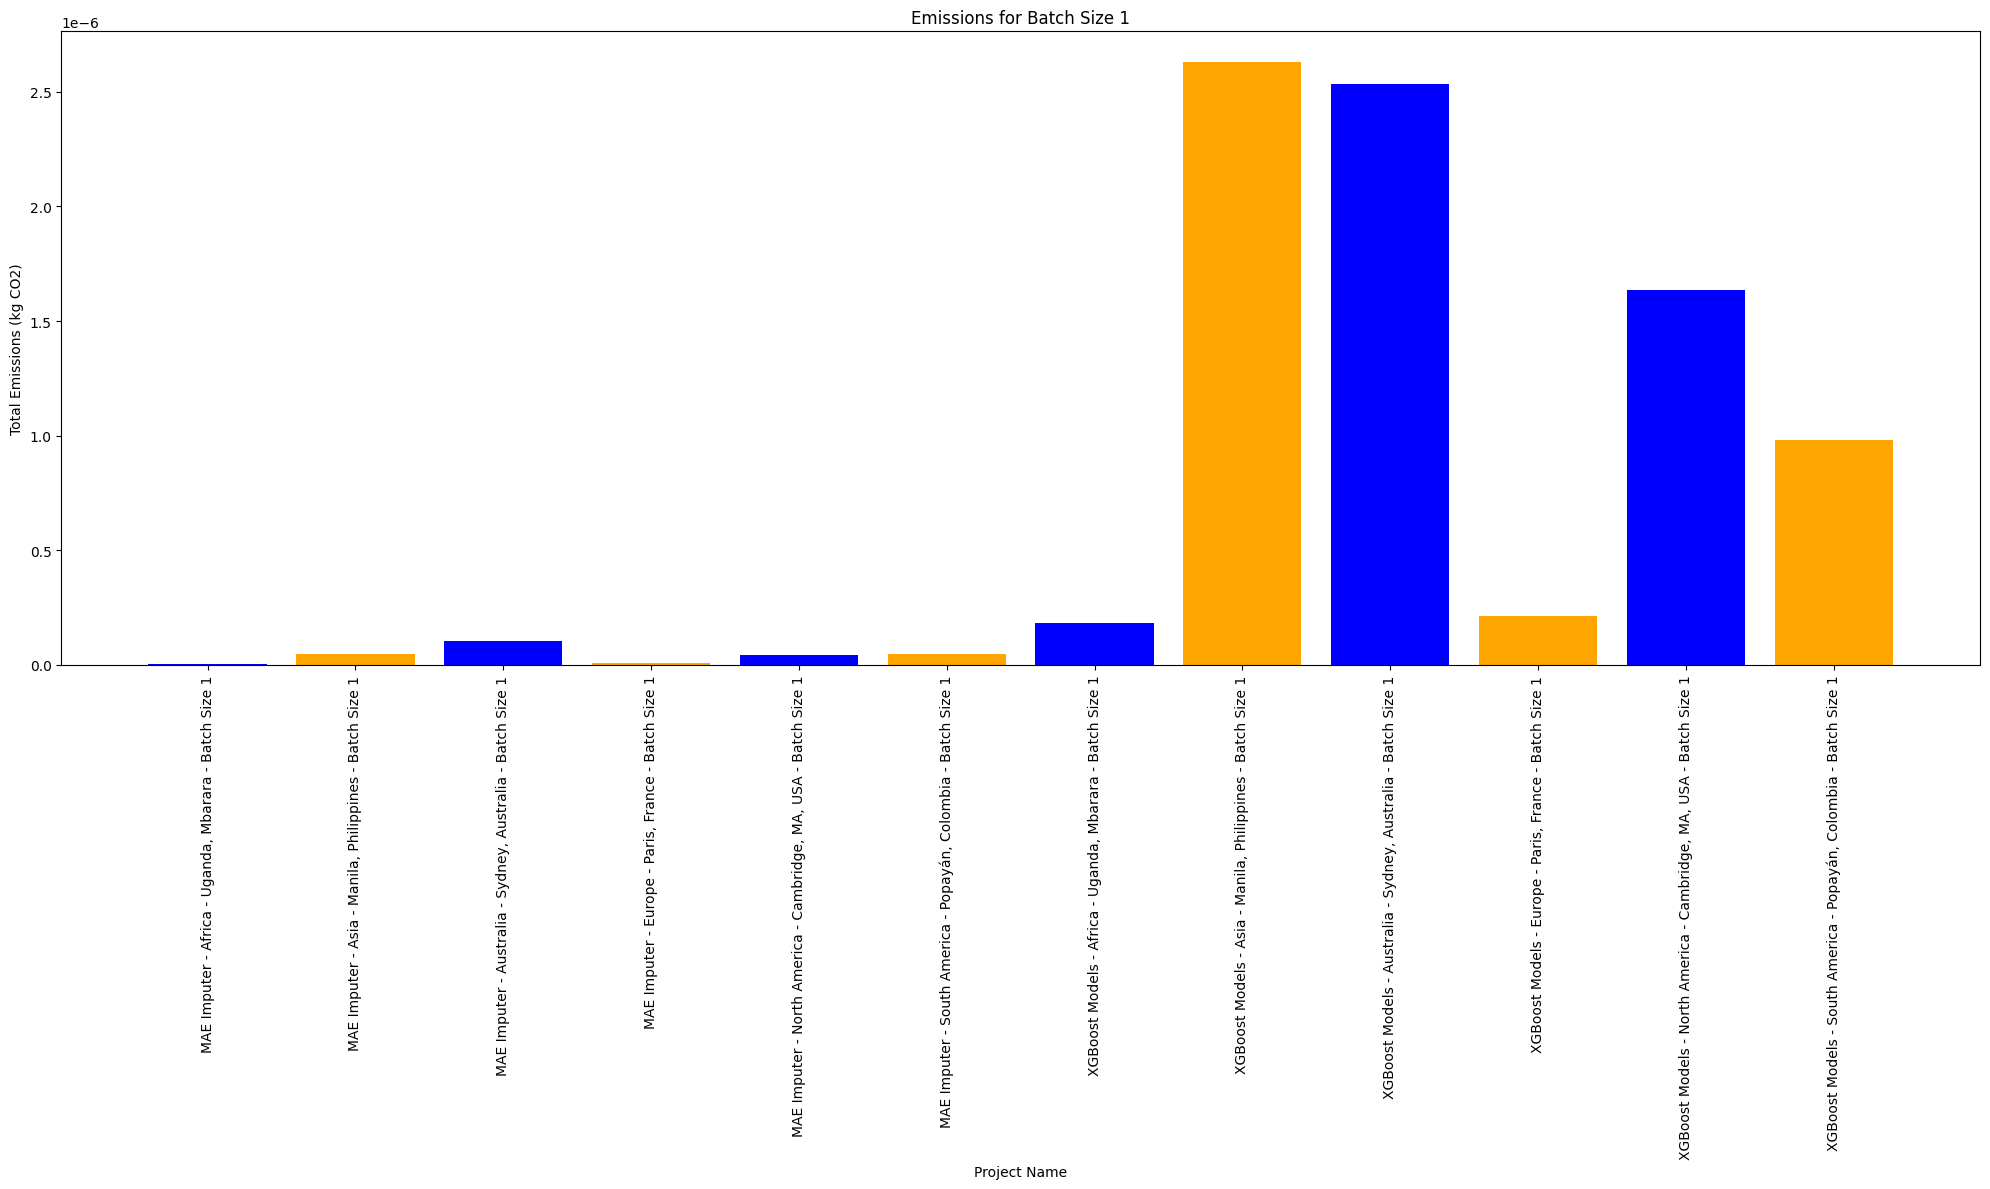

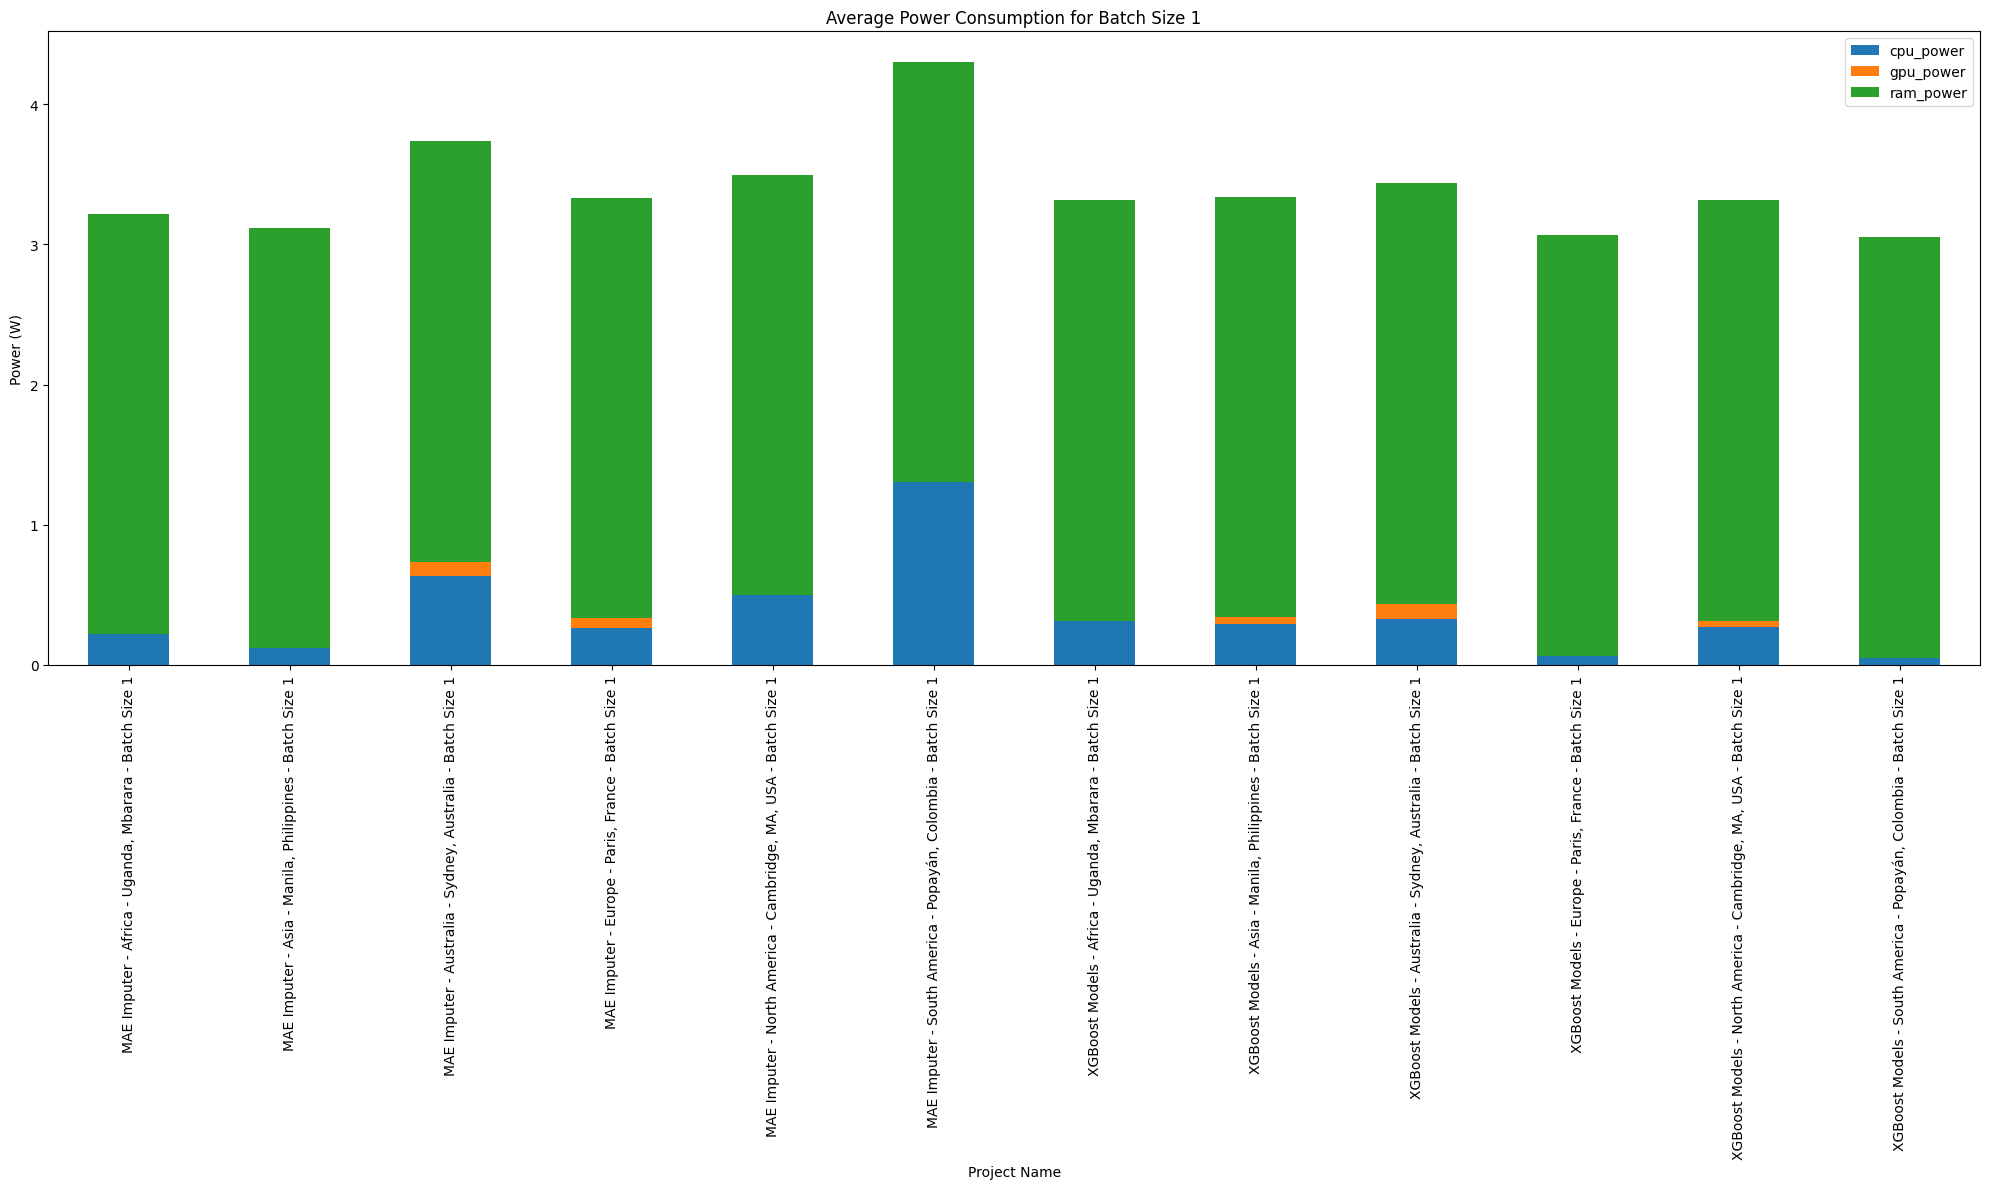

,project_name,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power
0,"MAE Imputer - Africa - Uganda, Mbarara - Batch...",6.349037,4.845753e-09,7.632265e-10,0.2176,0.0000,3.0
1,"MAE Imputer - Asia - Manila, Philippines - Bat...",6.332301,4.922937e-08,7.774326e-09,0.1204,0.0000,3.0
2,"MAE Imputer - Australia - Sydney, Australia - ...",6.410444,1.045727e-07,1.631287e-08,0.6324,0.1033,3.0
3,"MAE Imputer - Europe - Paris, France - Batch S...",6.663710,8.269167e-09,1.240925e-09,0.2642,0.0686,3.0
4,"MAE Imputer - North America - Cambridge, MA, U...",6.413308,4.226391e-08,6.590033e-09,0.4978,0.0000,3.0
5,"MAE Imputer - South America - Popayán, Colombi...",6.325326,4.593114e-08,7.261467e-09,1.3051,0.0000,3.0
6,"XGBoost Models - Africa - Uganda, Mbarara - Ba...",10.666676,1.823811e-07,1.709822e-08,0.3151,0.0000,3.0
7,"XGBoost Models - Asia - Manila, Philippines - ...",10.820034,2.631763e-06,2.432305e-07,0.2890,0.0500,3.0
8,"XGBoost Models - Australia - Sydney, Australia...",11.279440,2.535094e-06,2.247535e-07,0.3299,0.1066,3.0
9,"XGBoost Models - Europe - Paris, France - Batc...",10.737444,2.147538e-07,2.000046e-08,0.0641,0.0000,3.0


In [5]:
# Separate data for batch size 1
batch_1_data = emissions_data[emissions_data['project_name'].str.contains("Batch Size 1")]
batch_1_summary = batch_1_data.groupby('project_name').agg({
    'duration': 'sum',
    'emissions': 'sum',
    'emissions_rate': 'mean',
    'cpu_power': 'mean',
    'gpu_power': 'mean',
    'ram_power': 'mean'
}).reset_index()

# Perform analysis for each batch size
analyze_batch(batch_1_summary, "Batch Size 1")


In [6]:
# Create a new column to identify model type
batch_1_summary['model_type'] = batch_1_summary['project_name'].apply(lambda x: 'MAE' if 'MAE' in x else 'XGBoost')

# Group by model type and calculate mean
averages_1 = batch_1_summary.groupby('model_type').mean()
averages_1

/var/folders/4w/k6c16td51cv9ytcmnnvx3mpw0000gn/T/ipykernel_38781/429085891.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages_1 = batch_1_summary.groupby('model_type').mean()


,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power
model_type,,,,,,
MAE,6.415688,4.251868e-08,6.657141e-09,0.50625,0.028650,3.0
XGBoost,10.866340,1.363608e-06,1.242559e-07,0.21970,0.033817,3.0


### Analysis for batch size of 32

Analysis for Batch Size 32


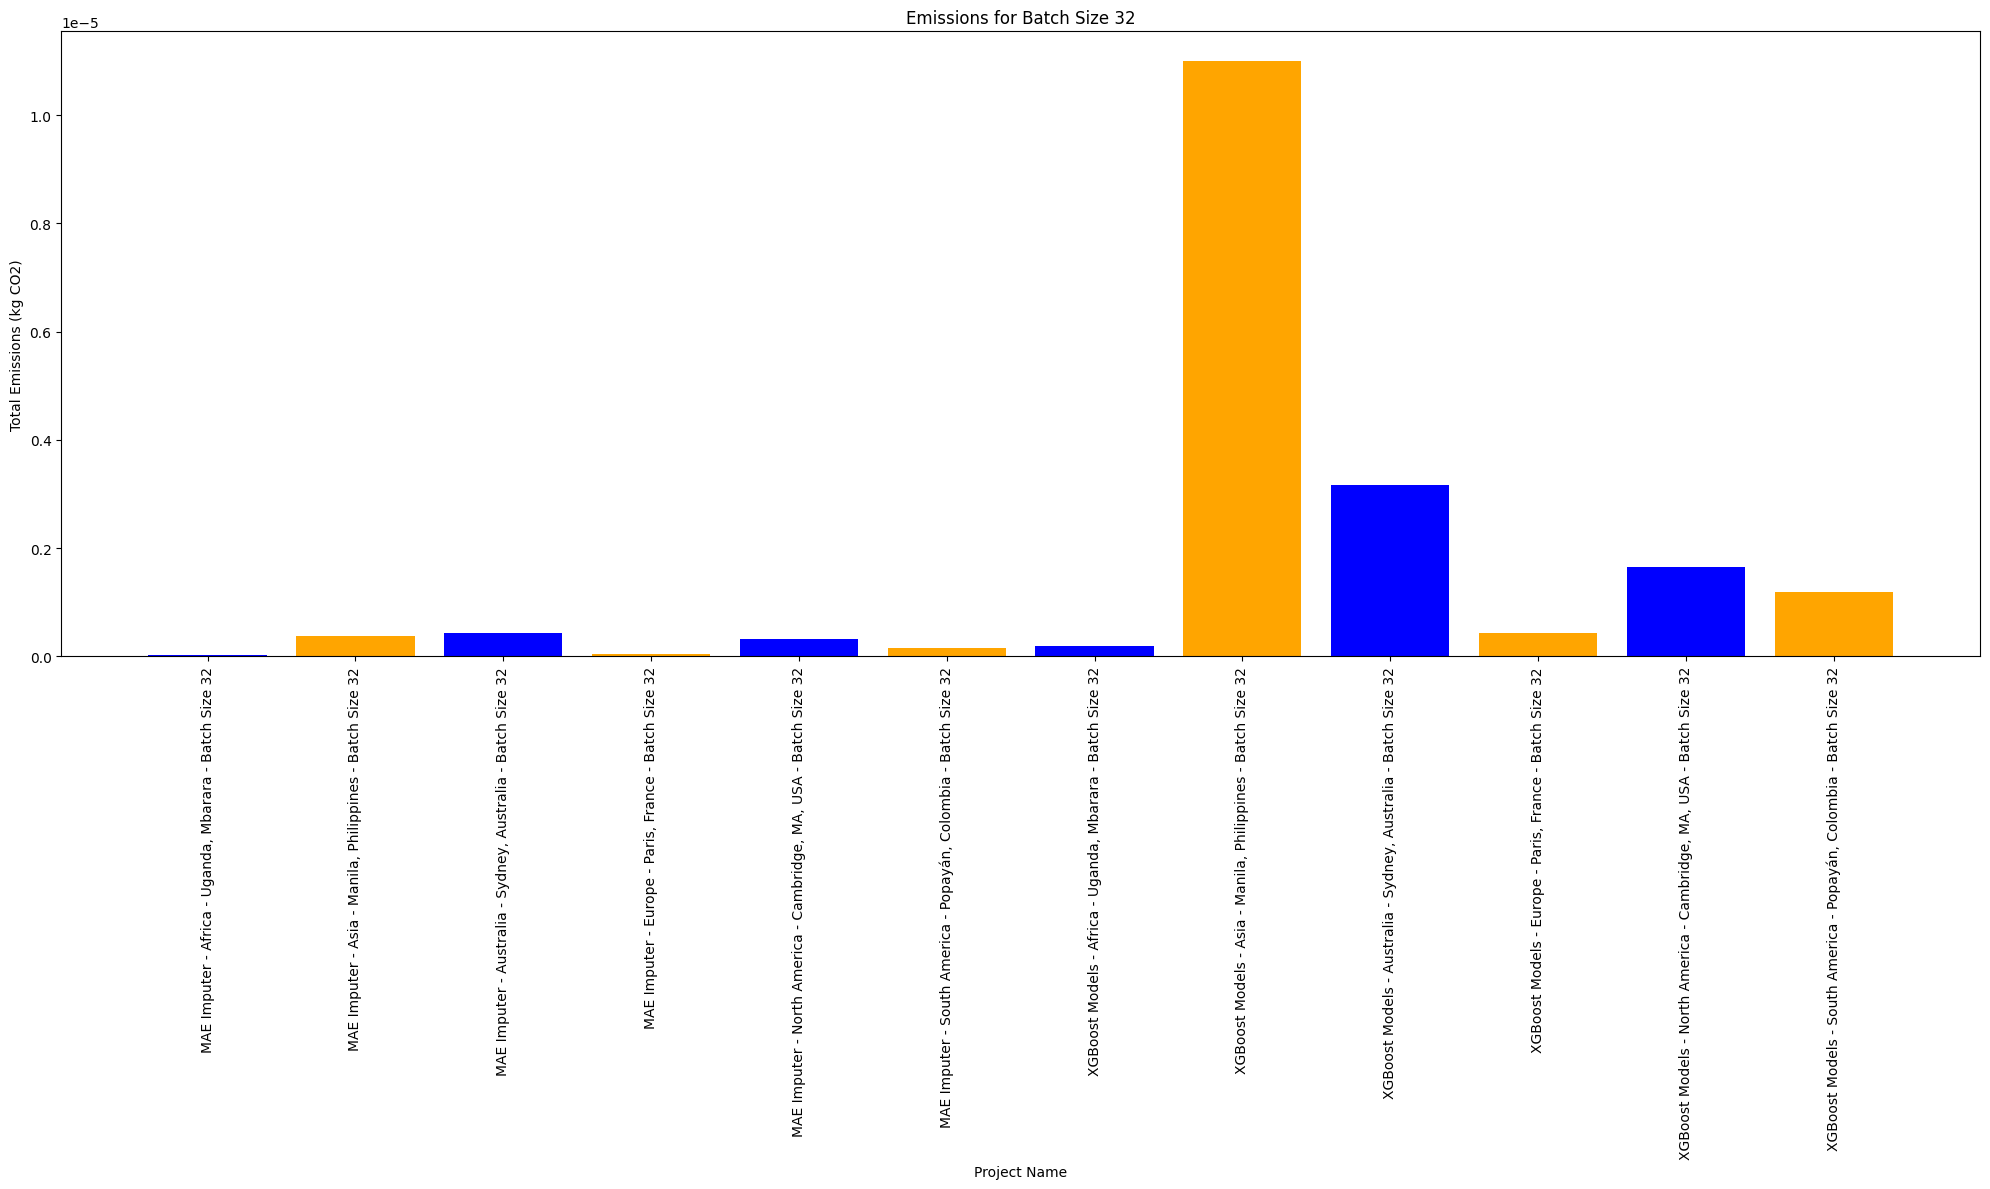

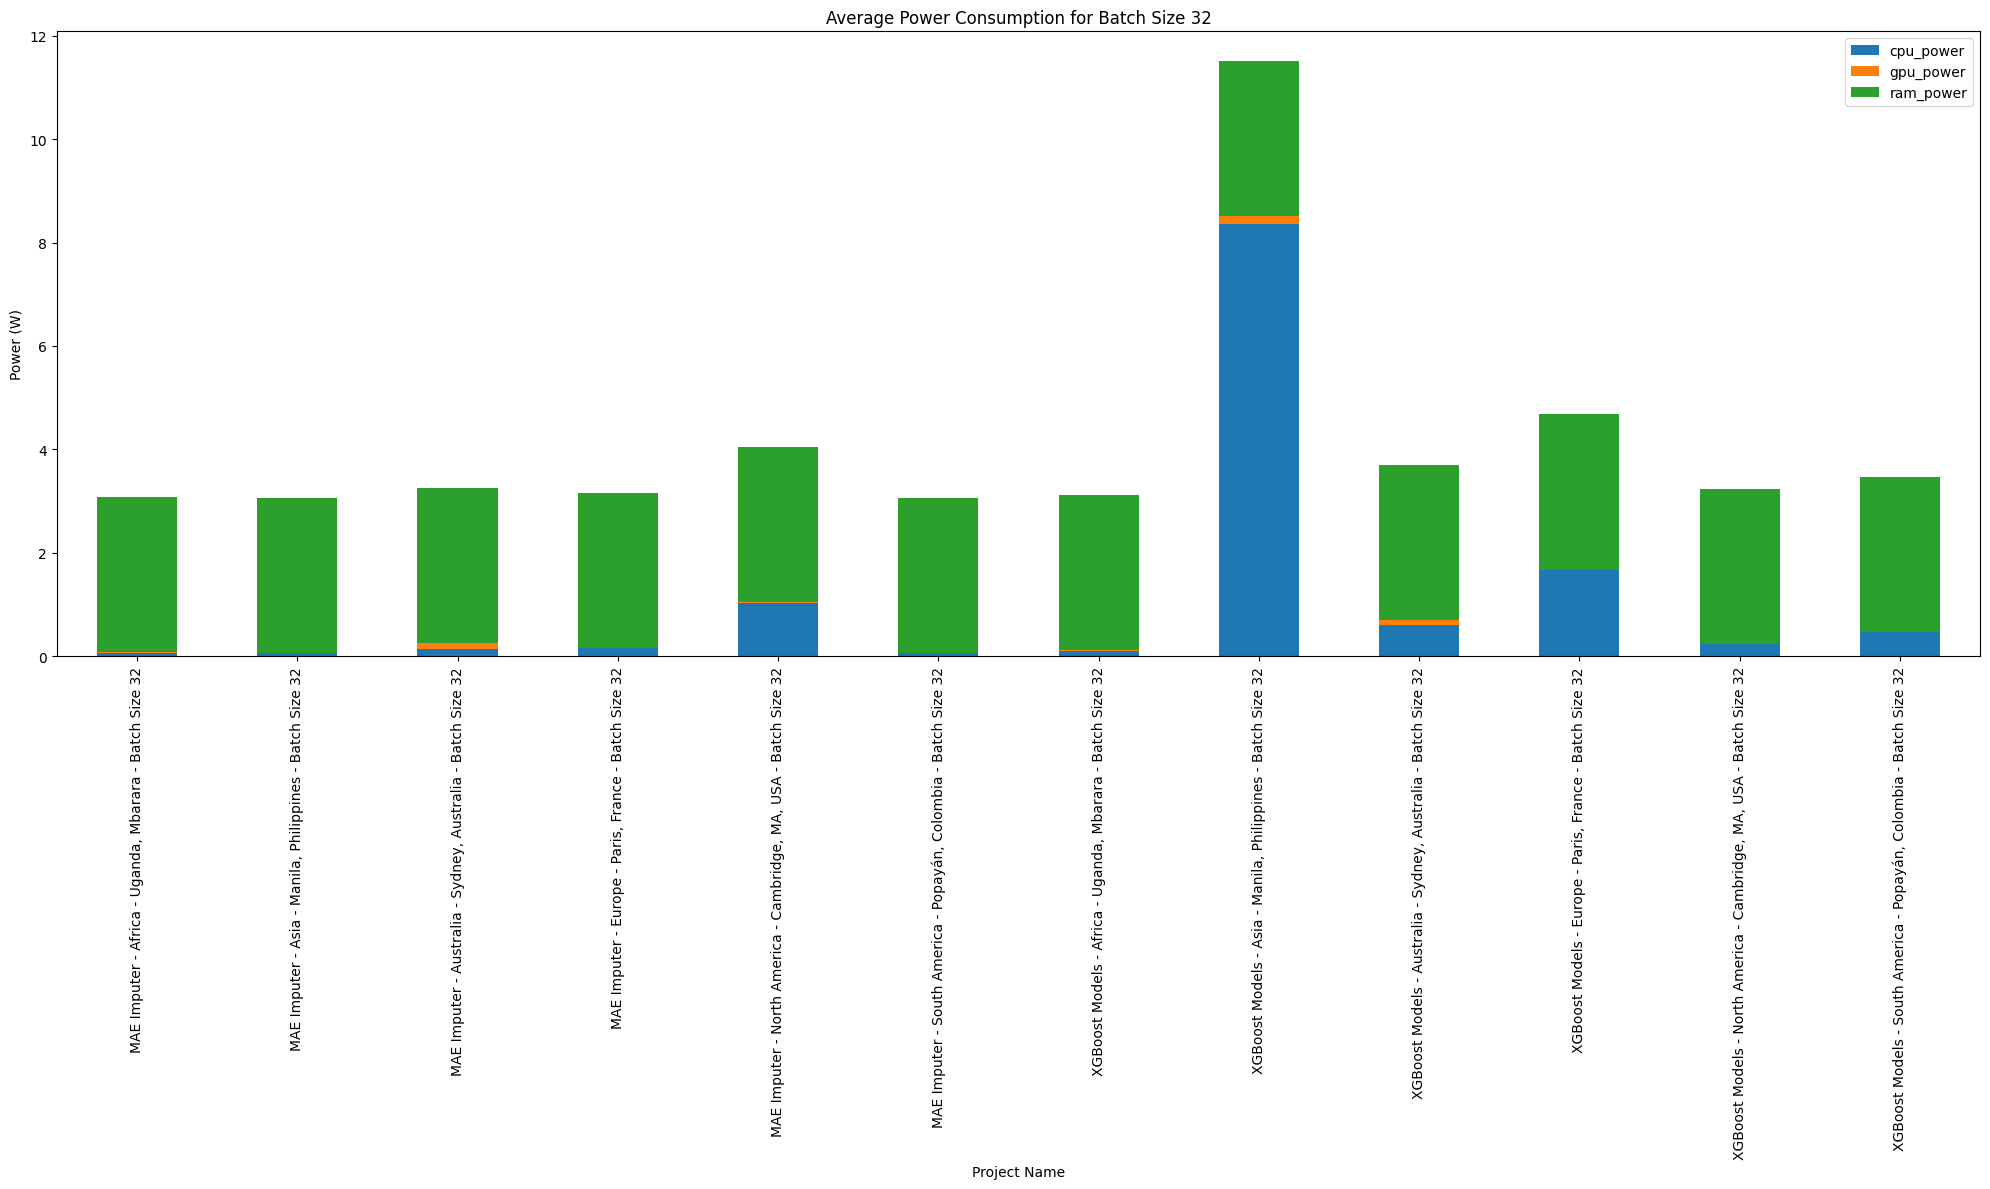

,project_name,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power
0,"MAE Imputer - Africa - Uganda, Mbarara - Batch...",7.017655,2.961073e-08,4.219463e-09,0.0687,0.0192,3.0
1,"MAE Imputer - Asia - Manila, Philippines - Bat...",6.939854,3.773630e-07,5.437621e-08,0.0609,0.0000,3.0
2,"MAE Imputer - Australia - Sydney, Australia - ...",7.085057,4.352445e-07,6.143134e-08,0.1479,0.1025,3.0
3,"MAE Imputer - Europe - Paris, France - Batch S...",6.925478,3.549680e-08,5.125537e-09,0.1657,0.0000,3.0
4,"MAE Imputer - North America - Cambridge, MA, U...",7.059210,3.239262e-07,4.588703e-08,1.0366,0.0061,3.0
5,"MAE Imputer - South America - Popayán, Colombi...",6.935028,1.611106e-07,2.323142e-08,0.0626,0.0000,3.0
6,"XGBoost Models - Africa - Uganda, Mbarara - Ba...",10.951113,1.821550e-07,1.663347e-08,0.1035,0.0219,3.0
7,"XGBoost Models - Asia - Manila, Philippines - ...",12.762831,1.099677e-05,8.616248e-07,8.3680,0.1400,3.0
8,"XGBoost Models - Australia - Sydney, Australia...",11.945596,3.172853e-06,2.656086e-07,0.6029,0.1017,3.0
9,"XGBoost Models - Europe - Paris, France - Batc...",12.422537,4.303537e-07,3.464298e-08,1.6659,0.0108,3.0


In [7]:
# Separate data for batch size 32
batch_32_data = emissions_data[emissions_data['project_name'].str.contains("Batch Size 32")]
batch_32_summary = batch_32_data.groupby('project_name').agg({
    'duration': 'sum',
    'emissions': 'sum',
    'emissions_rate': 'mean',
    'cpu_power': 'mean',
    'gpu_power': 'mean',
    'ram_power': 'mean'
}).reset_index()

analyze_batch(batch_32_summary, "Batch Size 32")

In [8]:
# Create a new column to identify model type
batch_32_summary['model_type'] = batch_32_summary['project_name'].apply(lambda x: 'MAE' if 'MAE' in x else 'XGBoost')

# Group by model type and calculate mean
averages_32 = batch_32_summary.groupby('model_type').mean()
averages_32

/var/folders/4w/k6c16td51cv9ytcmnnvx3mpw0000gn/T/ipykernel_38781/970669654.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages_32 = batch_32_summary.groupby('model_type').mean()


,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power
model_type,,,,,,
MAE,6.993714,2.271253e-07,3.237850e-08,0.257067,0.021300,3.0
XGBoost,11.703058,2.935091e-06,2.389255e-07,1.908717,0.046033,3.0


### Analysis for batch size of 64

Analysis for Batch Size 64


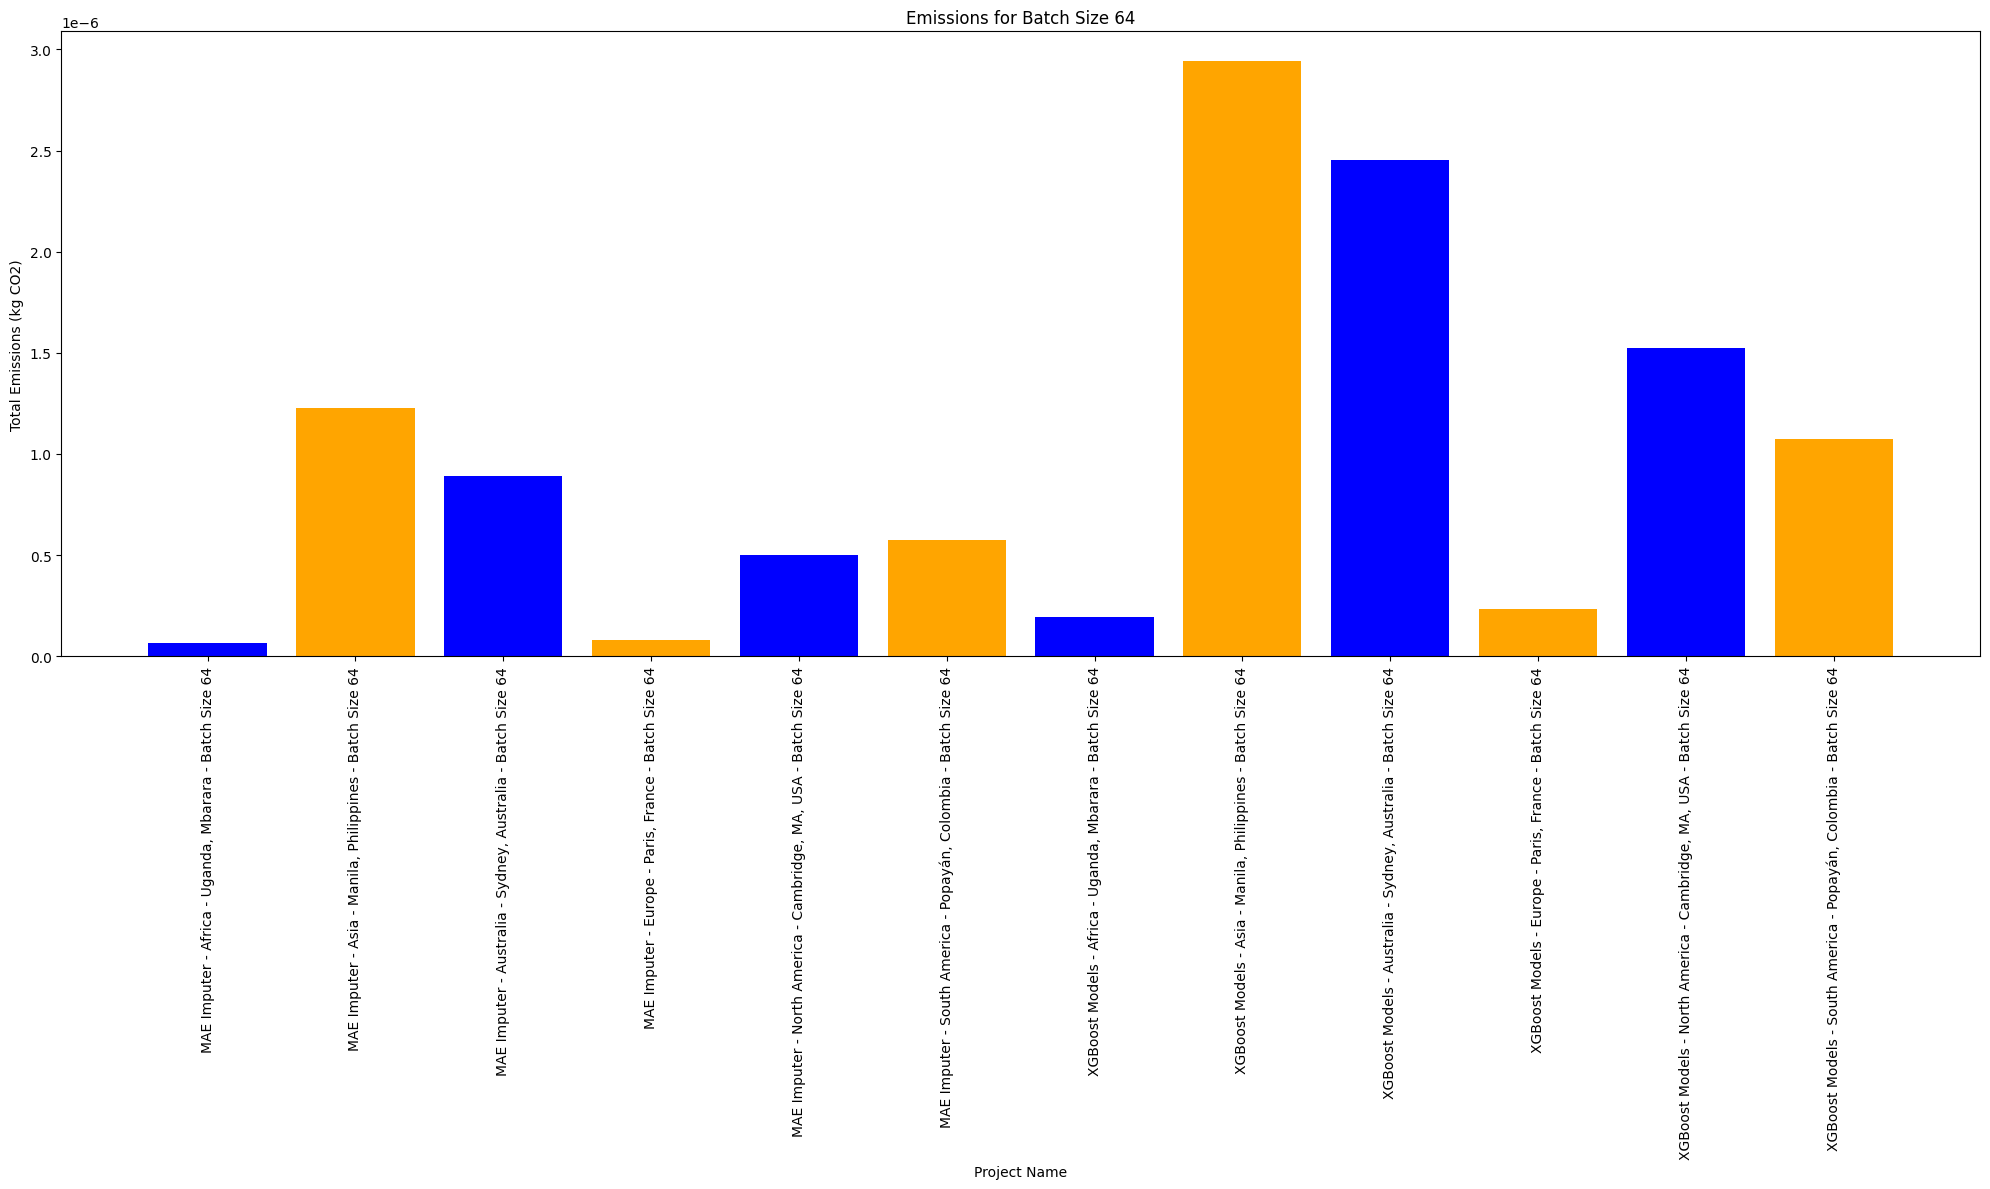

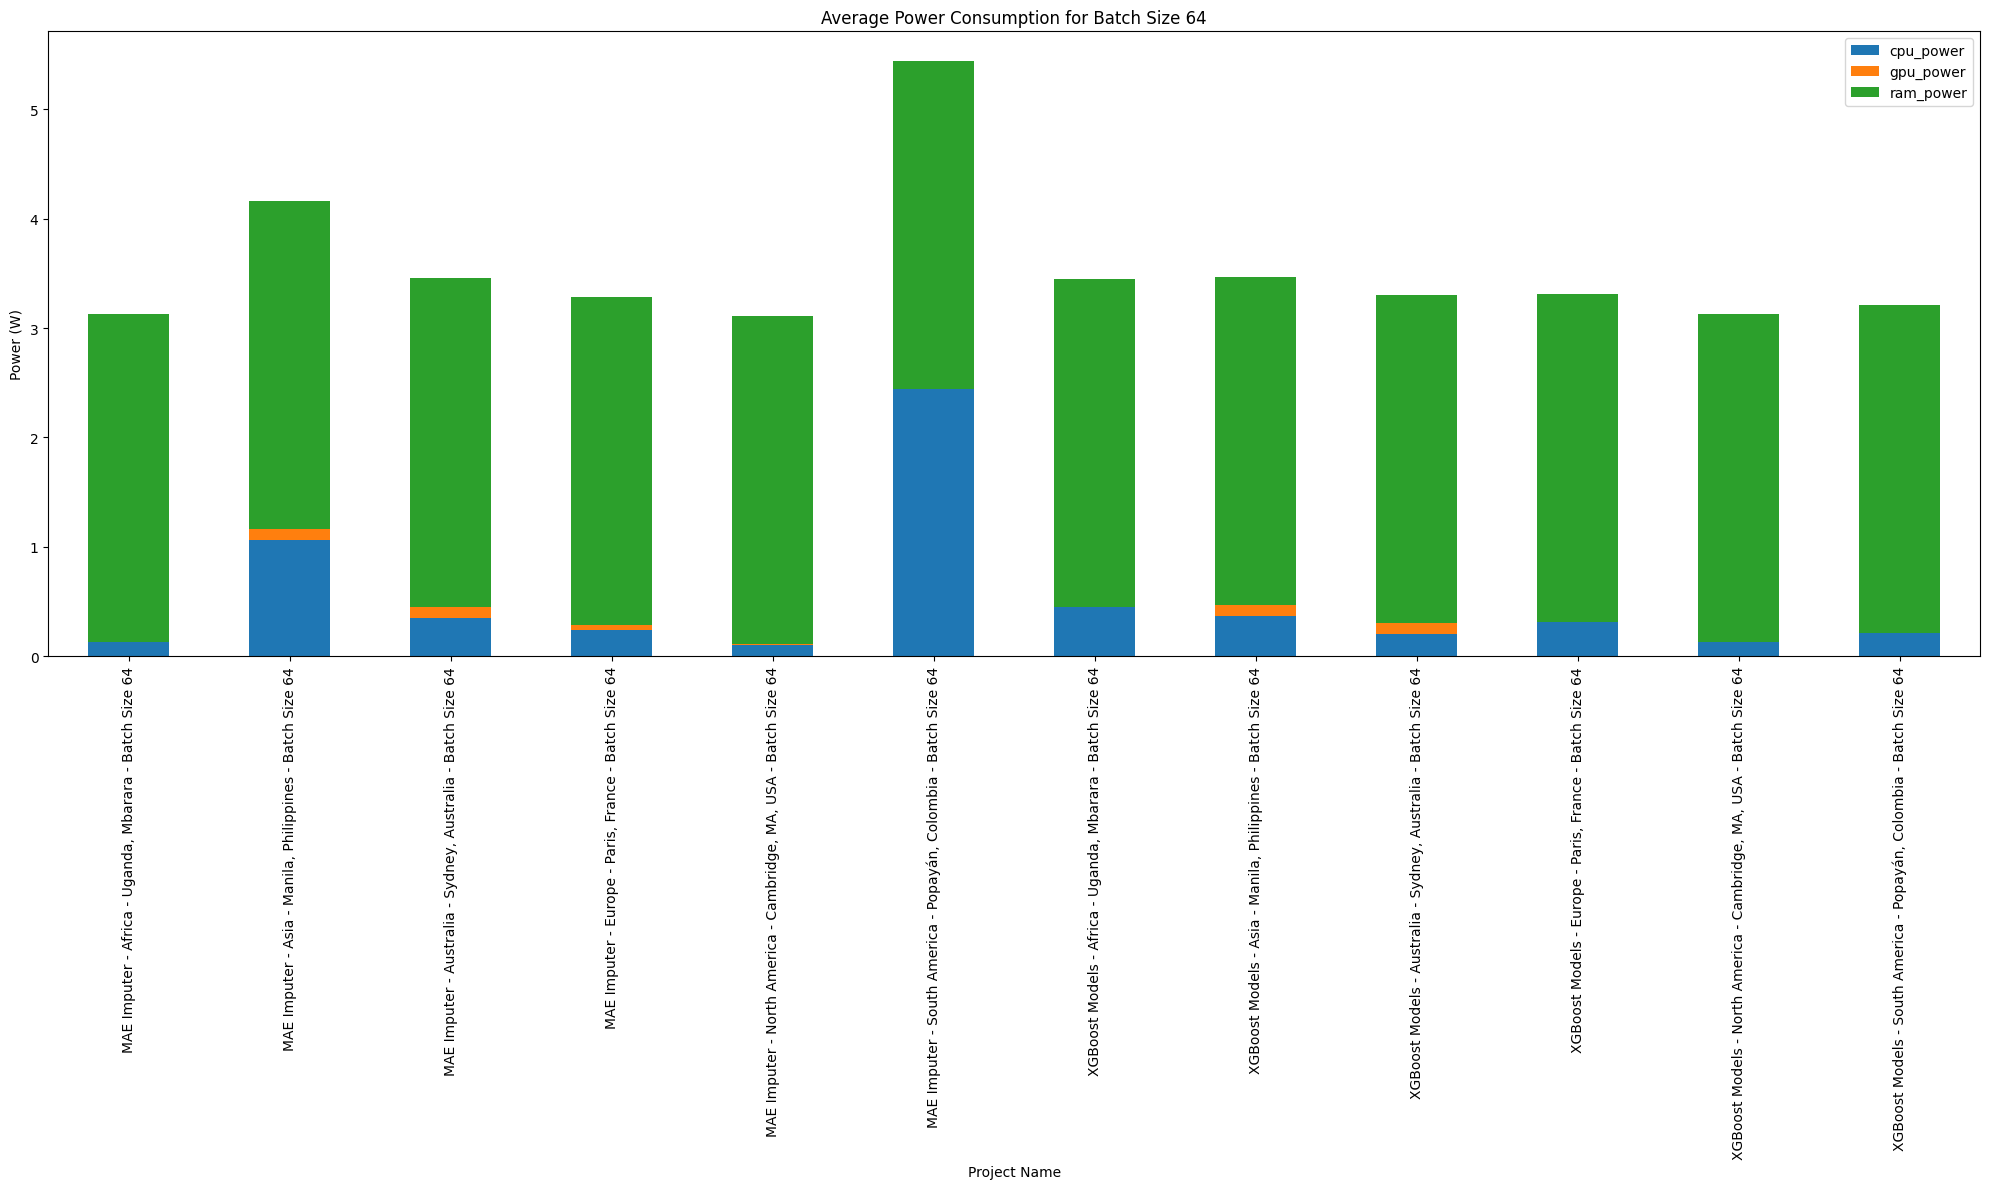

,project_name,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power
0,"MAE Imputer - Africa - Uganda, Mbarara - Batch...",7.846491,6.331756e-08,8.069537e-09,0.1297,0.0018,3.0
1,"MAE Imputer - Asia - Manila, Philippines - Bat...",7.871424,1.225571e-06,1.556988e-07,1.0662,0.0971,3.0
2,"MAE Imputer - Australia - Sydney, Australia - ...",7.881736,8.909834e-07,1.130441e-07,0.3511,0.1026,3.0
3,"MAE Imputer - Europe - Paris, France - Batch S...",7.700499,7.817639e-08,1.015212e-08,0.2421,0.0433,3.0
4,"MAE Imputer - North America - Cambridge, MA, U...",7.833352,4.997854e-07,6.380225e-08,0.1027,0.0057,3.0
5,"MAE Imputer - South America - Popayán, Colombi...",7.826622,5.731448e-07,7.323016e-08,2.4412,0.0000,3.0
6,"XGBoost Models - Africa - Uganda, Mbarara - Ba...",10.695645,1.918833e-07,1.794032e-08,0.4484,0.0036,3.0
7,"XGBoost Models - Asia - Manila, Philippines - ...",11.197292,2.942124e-06,2.627532e-07,0.3645,0.1047,3.0
8,"XGBoost Models - Australia - Sydney, Australia...",11.073174,2.452444e-06,2.214761e-07,0.2030,0.1017,3.0
9,"XGBoost Models - Europe - Paris, France - Batc...",10.755545,2.339615e-07,2.175264e-08,0.3113,0.0009,3.0


In [9]:
# Separate data for batch size 64
batch_64_data = emissions_data[emissions_data['project_name'].str.contains("Batch Size 64")]
batch_64_summary = batch_64_data.groupby('project_name').agg({
    'duration': 'sum',
    'emissions': 'sum',
    'emissions_rate': 'mean',
    'cpu_power': 'mean',
    'gpu_power': 'mean',
    'ram_power': 'mean'
}).reset_index()

analyze_batch(batch_64_summary, "Batch Size 64")

In [11]:
# Create a new column to identify model type
batch_64_summary['model_type'] = batch_64_summary['project_name'].apply(lambda x: 'MAE' if 'MAE' in x else 'XGBoost')

# Group by model type and calculate mean
averages_64 = batch_64_summary.groupby('model_type').mean()
averages_64

/var/folders/4w/k6c16td51cv9ytcmnnvx3mpw0000gn/T/ipykernel_38781/1945378450.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages_64 = batch_64_summary.groupby('model_type').mean()


,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power
model_type,,,,,,
MAE,7.826687,5.551631e-07,7.066615e-08,0.722167,0.04175,3.0
XGBoost,10.946252,1.403389e-06,1.267618e-07,0.278117,0.03515,3.0
